# Vehicle default prediction model

### Importing data and standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import re
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Data/data.csv')
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.shape

(233154, 41)

In [5]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()

df.columns = df.columns.str.replace(".","_")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
uniqueid                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
current_pincode_id                     233154 non-null int64
date_of_birth                          233154 non-null object
employment_type                        225493 non-null object
disbursaldate                          233154 non-null object
state_id                               233154 non-null int64
employee_code_id                       233154 non-null int64
mobileno_avl_flag                      233154 non-null int64
aadhar_flag                   

In [8]:
df.describe()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


# Cleaning Data

In [9]:
df.isnull().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                

In [10]:
df['employment_type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [11]:
df['employment_type'].value_counts()

Self employed    127635
Salaried          97858
Name: employment_type, dtype: int64

In [12]:
df['employment_type'].fillna('Other', inplace=True)

In [13]:
df['employment_type'].isnull().sum()

0

In [14]:
df['employment_type'].value_counts()

Self employed    127635
Salaried          97858
Other              7661
Name: employment_type, dtype: int64

In [15]:
df[df.duplicated()]

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default


In [16]:
df.nunique()

uniqueid                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
current_pincode_id                       6698
date_of_birth                           15433
employment_type                             3
disbursaldate                              84
state_id                                   22
employee_code_id                         3270
mobileno_avl_flag                           1
aadhar_flag                                 2
pan_flag                                    2
voterid_flag                                2
driving_flag                                2
passport_flag                               2
perform_cns_score                         573
perform_cns_score_description              20
pri_no_of_accts                   

In [17]:
df['mobileno_avl_flag'].value_counts()

1    233154
Name: mobileno_avl_flag, dtype: int64

In [18]:
df.drop(['mobileno_avl_flag'], axis=1, inplace=True)

In [19]:
df['perform_cns_score_description'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [20]:
df['perform_cns_score_description'] = df['perform_cns_score_description'].replace({'C-Very Low Risk':'Very Low', 'A-Very Low Risk':'Very Low',
                                                       'B-Very Low Risk':'Very Low', 'D-Very Low Risk':'Very Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       })

In [21]:
df['perform_cns_score_description'].value_counts()

Not Scored    129785
Very Low       50728
Low            18294
Medium         12412
High           12025
Very High       9910
Name: perform_cns_score_description, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
uniqueid                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
current_pincode_id                     233154 non-null int64
date_of_birth                          233154 non-null object
employment_type                        233154 non-null object
disbursaldate                          233154 non-null object
state_id                               233154 non-null int64
employee_code_id                       233154 non-null int64
aadhar_flag                            233154 non-null int64
pan_flag                      

## Converting to appropriate data types

In [23]:
def toMons(str):
  val = []
  for n in df[str]:
    temp = int(re.split("[yrs mon]+", n)[0]) * 12 + int(re.split("[yrs mon]+", n)[1])
    val.append(temp)
  return val

In [24]:
df['credit_history_length'] = toMons('credit_history_length')

In [25]:
df['average_acct_age'] = toMons('average_acct_age')

In [26]:
df['credit_history_length'].head()

0     0
1    23
2     0
3    15
4     0
Name: credit_history_length, dtype: int64

In [27]:
df['average_acct_age'].head()

0     0
1    23
2     0
3     8
4     0
Name: average_acct_age, dtype: int64

In [28]:
df['age'] = df['date_of_birth'].apply('{:6}'.format)

now = pd.Timestamp('now')
df['age'] = pd.to_datetime(df['age'], format='%d-%m-%y')    # 1
df['age'] = df['age'].where(df['age'] < now, df['age'] - np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['age']).astype('<m8[Y]').astype('int')

In [29]:
df['age']

0         37
1         35
2         35
3         27
4         43
          ..
233149    32
233150    32
233151    44
233152    26
233153    37
Name: age, Length: 233154, dtype: int32

fig, ax = plt.subplots(figsize=(12, 8))
sb.distplot(df['age'])
sb.set(style='darkgrid')
plt.title("Distribution of Age")

default = df[df['loan_default'] == 1]

default['employment_type'].value_counts()

In [32]:
df['disbursaldate']

0         03-08-18
1         26-09-18
2         01-08-18
3         26-10-18
4         26-09-18
            ...   
233149    26-10-18
233150    23-10-18
233151    24-10-18
233152    29-09-18
233153    27-10-18
Name: disbursaldate, Length: 233154, dtype: object

In [33]:
df['disbursaldate'] = df['disbursaldate'].apply('{:6}'.format)

now = pd.Timestamp('now')
df['disbursaldate'] = pd.to_datetime(df['disbursaldate'], format='%d-%m-%y')    # 1
df['disbursaldate'] = df['disbursaldate'].where(df['disbursaldate'] < now, df['disbursaldate'] - np.timedelta64(100, 'Y'))   # 2
df['loan_duration'] = (now - df['disbursaldate']).astype('<m8[Y]').astype('int')

#### There are some columns that will not be useful for the model hence will be imputed

In [34]:
unwanted_cols = ['uniqueid','current_pincode_id',
                   'employee_code_id','state_id','branch_id','manufacturer_id',
                   'supplier_id','date_of_birth','disbursaldate','no_of_inquiries']

In [35]:
df.drop(unwanted_cols, axis=1, inplace=True)

In [36]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'employment_type',
       'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'passport_flag', 'perform_cns_score', 'perform_cns_score_description',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'loan_default', 'age', 'loan_duration'],
      dtype='object')

In [37]:
df['total_no_accts'] = df['pri_no_of_accts'] + df['sec_no_of_accts']
df['total_active_accts'] = df['pri_active_accts'] + df['sec_active_accts']
df['total_overdue_accts'] = df['pri_overdue_accts'] + df['sec_overdue_accts']
df['total_current_balance'] = df['pri_current_balance'] + df['sec_current_balance']
df['total_sanctioned_amnt'] = df['pri_sanctioned_amount'] + df['sec_sanctioned_amount']
df['total_disbursed_amnt'] = df['pri_disbursed_amount'] + df['sec_disbursed_amount']
df['total_instal_amnt'] = df['primary_instal_amt'] + df['sec_instal_amt']

In [38]:
df.drop(['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
                                'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
                                'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
                                'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
                                'primary_instal_amt', 'sec_instal_amt'], axis=1, inplace=True)

In [39]:
df

,disbursed_amount,asset_cost,ltv,employment_type,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,...,loan_default,age,loan_duration,total_no_accts,total_active_accts,total_overdue_accts,total_current_balance,total_sanctioned_amnt,total_disbursed_amnt,total_instal_amnt
0,50578,58400,89.55,Salaried,1,0,0,0,0,0,...,0,37,2,0,0,0,0,0,0,0
1,47145,65550,73.23,Self employed,1,0,0,0,0,598,...,1,35,2,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63,Self employed,1,0,0,0,0,0,...,0,35,2,0,0,0,0,0,0,0
3,57513,66113,88.48,Self employed,1,0,0,0,0,305,...,1,27,2,3,0,0,0,0,0,31
4,52378,60300,88.39,Self employed,1,0,0,0,0,0,...,1,43,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,Salaried,0,0,1,0,0,735,...,0,32,2,4,3,0,390443,416133,416133,4084
233150,73651,100600,74.95,Self employed,0,0,1,0,0,825,...,0,32,2,1,0,0,0,0,0,1565
233151,33484,71212,48.45,Salaried,1,0,0,0,0,0,...,0,44,2,0,0,0,0,0,0,0
233152,34259,73286,49.10,Salaried,1,0,0,0,0,0,...,0,26,2,0,0,0,0,0,0,0


### Feature Engineering

In [40]:
cate_features = df[['employment_type', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']]
cate_features

,employment_type,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag
0,Salaried,1,0,0,0,0
1,Self employed,1,0,0,0,0
2,Self employed,1,0,0,0,0
3,Self employed,1,0,0,0,0
4,Self employed,1,0,0,0,0
...,...,...,...,...,...,...
233149,Salaried,0,0,1,0,0
233150,Self employed,0,0,1,0,0
233151,Salaried,1,0,0,0,0
233152,Salaried,1,0,0,0,0


In [41]:
cate_features_encoded = pd.get_dummies(cate_features)
cate_features_encoded

,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,employment_type_Other,employment_type_Salaried,employment_type_Self employed
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
233149,0,0,1,0,0,0,1,0
233150,0,0,1,0,0,0,0,1
233151,1,0,0,0,0,0,1,0
233152,1,0,0,0,0,0,1,0


In [42]:
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(df[['perform_cns_score_description']])

result

array([[3.],
       [2.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [43]:
perf_score_encoded=pd.DataFrame(result,columns=['perform_cns_score_description'])
perf_score_encoded

,perform_cns_score_description
0,3.0
1,2.0
2,3.0
3,4.0
4,3.0
...,...
233149,5.0
233150,5.0
233151,3.0
233152,3.0


In [44]:
num_features = df.drop(['employment_type', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score_description', 'loan_default'], axis=1)
num_features_cols = num_features.columns
num_features_cols

Index(['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'age', 'loan_duration',
       'total_no_accts', 'total_active_accts', 'total_overdue_accts',
       'total_current_balance', 'total_sanctioned_amnt',
       'total_disbursed_amnt', 'total_instal_amnt'],
      dtype='object')

In [45]:
X = pd.concat([num_features,cate_features_encoded, perf_score_encoded], axis=1)
y = df['loan_default']

In [58]:
X.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'age', 'loan_duration',
       'total_no_accts', 'total_active_accts', 'total_overdue_accts',
       'total_current_balance', 'total_sanctioned_amnt',
       'total_disbursed_amnt', 'total_instal_amnt', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag',
       'employment_type_Other', 'employment_type_Salaried',
       'employment_type_Self employed', 'perform_cns_score_description'],
      dtype='object')

In [50]:
y.shape

(233154,)

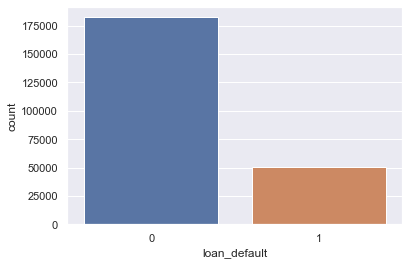

In [47]:
sb.countplot(x="loan_default", data=df)
plt.show()

In [82]:
len(df['loan_default'] == 1) / 

233154

In [52]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y.values.ravel())

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0)

In [54]:
X_train
X_test

,disbursed_amount,asset_cost,ltv,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,age,loan_duration,...,total_instal_amnt,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,employment_type_Other,employment_type_Salaried,employment_type_Self employed,perform_cns_score_description
301609,52693,66439,83.000842,577,0,0,12,14,37,2,...,577,1,0,0,0,0,0,0,0,0.757426
283735,53278,68266,79.925609,462,0,0,6,6,37,2,...,1762,1,0,0,0,0,0,0,0,4.235747
259021,54559,64104,88.064059,67,1,0,4,7,38,2,...,1714,1,0,0,0,0,0,0,1,2.908631
84230,31804,66941,50.790000,738,2,0,6,10,54,2,...,0,0,0,1,0,0,0,0,1,5.000000
228741,54763,67600,82.840000,15,1,0,0,0,45,2,...,0,1,0,0,0,0,0,0,1,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186491,73017,84389,88.870000,768,2,0,18,37,33,2,...,1901,0,0,1,0,0,0,1,0,5.000000
231131,60447,72971,84.280000,0,0,0,0,0,37,2,...,0,1,1,0,0,0,0,1,0,3.000000
345838,95774,171740,58.230493,610,1,0,12,19,37,2,...,1859,1,0,0,0,0,0,0,1,4.695707
165593,54619,112798,50.530000,0,0,0,0,0,31,2,...,0,0,0,0,1,0,0,0,1,3.000000


X_train_cate = X_train[['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'passport_flag', 'employment_type_Other', 'employment_type_Salaried',
       'employment_type_Self employed', 'perform_cns_score_description']]


n_features = SelectKBest(score_func=chi2,k=9)

num_of_cols=n_features.fit(X_train_cate,y_train)
plt.figure(figsize=(7,7))
sb.barplot(x=num_of_cols.scores_,y=X_train_cate.columns)
plt.title('Feature scores')
plt.show()

X_train_num = X_train.drop(X_train_cate, axis=1)

n_features = SelectKBest(score_func=f_classif,k=10)

num_of_cols=n_features.fit(X_train_num,y_train)
plt.figure(figsize=(7,7))
sb.barplot(x=num_of_cols.scores_,y=X_train_num.columns)
plt.title('Feature scores')
plt.show()

### Standardization

In [61]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Different  Classification Algorithms

In [71]:
lr = LogisticRegression(C=5.0)

In [72]:
lr.fit(X_train, y_train)
lr_pred_proba = lr.predict_proba(X_test)

lr_auc = roc_auc_score(y_test, lr_pred_proba[:,1])
lr_auc

0.7996447843592838

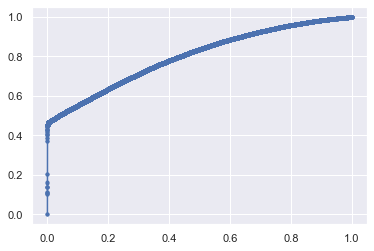

In [64]:
lr_auc = roc_auc_score(y_test, lr_pred_proba[:,1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba[:,1])
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

In [65]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
xg_pred_proba = xg.predict_proba(X_test)

xg_auc = roc_auc_score(y_test, xg_pred_proba[:,1])
xg_auc

[14:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8585487537298794

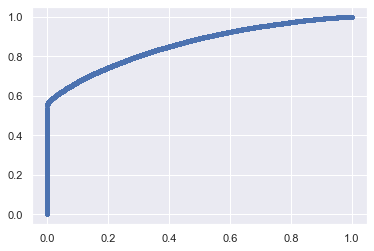

In [67]:
xg_auc = roc_auc_score(y_test, xg_pred_proba[:,1])
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_pred_proba[:,1])
plt.plot(xg_fpr, xg_tpr, marker='.', label='XGBoost')

In [68]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred_proba = knn.predict_proba(X_test)

knn_auc = roc_auc_score(y_test, knn_pred_proba[:,1])
knn_auc

0.8177846182278364

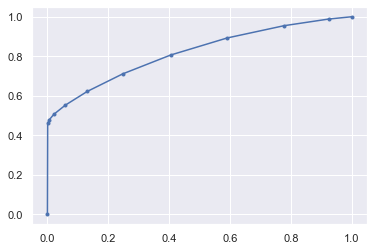

In [69]:
knn_auc = roc_auc_score(y_test, knn_pred_proba[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred_proba[:,1])
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict_proba(X_test)[:,1]

dt_auc = roc_auc_score(y_test, dt_pred)
dt_auc

0.7534939446547955

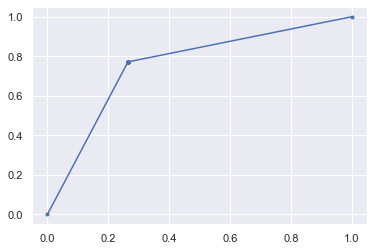

In [79]:
dt_auc = roc_auc_score(y_test, dt_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict_proba(X_test)[:,1]
rfc_auc = roc_auc_score(y_test, rfc_pred)
rfc_auc

0.8824357413550242

Text(0, 0.5, 'True Positive Rate (TPR)')

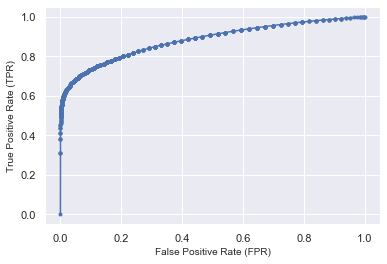

In [78]:
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)

plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate (FPR)', fontsize=10)
plt.ylabel('True Positive Rate (TPR)', fontsize=10)

#### Cross-validation for Random Forest Classifier

In [81]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring = "roc_auc")

In [84]:
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.8773688  0.88050289 0.88242487 0.87794123 0.88247244 0.87978391
 0.87983734 0.88101505 0.8804064  0.88085683]
Mean: 0.8802609749241638


In [85]:
rfc = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict_proba(X_test)

rfc_auc = roc_auc_score(y_test, rfc_pred[:,1])
rfc_auc

KeyboardInterrupt: 

In [ ]:
rfc = RandomForestClassifier(max_depth=None, min_impurity_split=0.2, n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict_proba(X_test)
rfc_pred

In [ ]:
rfc_auc = roc_auc_score(y_test, rfc_pred)
rfc_auc